# 13 - Forecasting

## Aufgabe 13.3

In [34]:
import pandas as pd
import numpy as np

# Load data
global_temp = pd.read_csv('data/global_temp.csv')

# Set DatetimeIndex
global_temp["Zeit"] = pd.to_datetime(global_temp["Zeit"])
global_temp.set_index("Zeit", inplace=True)


# Average per year
# Select years in set:
years = global_temp.index.year.unique()
# Calculate average per year
yearly_avg = []
for year in years:
    yearly_temp = global_temp.loc[global_temp.index.year == year]
    yearly_avg.append(yearly_temp.mean()[0])
    
# create new DataFrame with the average temperature per year
years = pd.to_datetime(years, format="%Y")
global_temp_year = pd.DataFrame(data={"yearly_avg": yearly_avg},
                                index = pd.DatetimeIndex(
                                    data=years, freq='infer'))

global_temp_year

,yearly_avg
Zeit,
1850-01-01,-0.607667
1851-01-01,-0.229083
1852-01-01,-0.332417
1853-01-01,-0.487667
1854-01-01,-0.157083
...,...
2013-01-01,0.950583
2014-01-01,1.001667
2015-01-01,1.359417


In [35]:
# Load data
global_temp = pd.read_csv('./data/global_temp.csv')
# Convert global_temp to Datetime Format
global_temp["Zeit"] = pd.to_datetime(global_temp["Zeit"])
# Create pandas DateTimeIndex
dtindex = pd.DatetimeIndex(data=global_temp["Zeit"], freq='infer')
# Set as Index
global_temp.set_index(dtindex, inplace=True)
global_temp.drop("Zeit", axis=1, inplace=True)


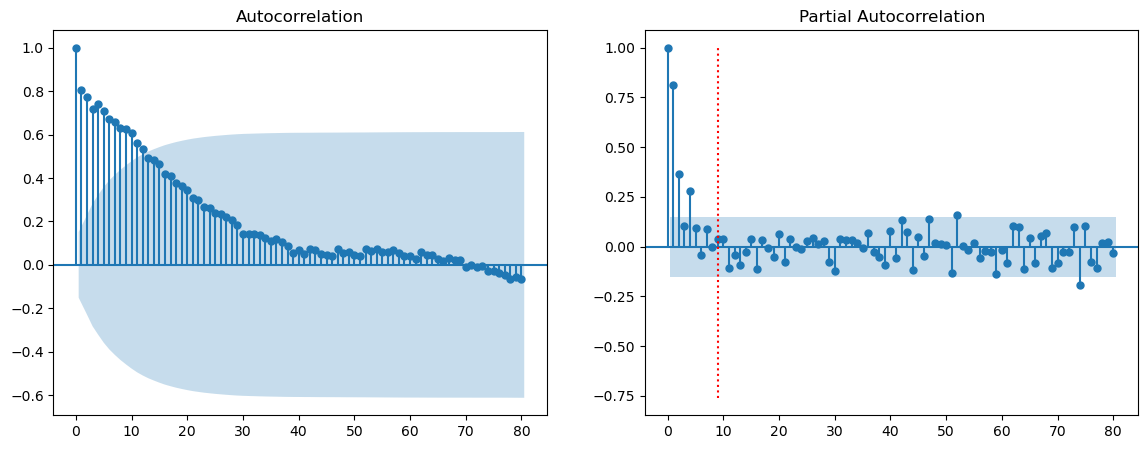

In [ ]:
# 13.3 b) correlogram & partial correlogram
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf



# Plot
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
plot_acf(global_temp_year, lags=80, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
plot_pacf(global_temp_year, lags=80, ax=ax2)
ax2.plot([9, 9], [-0.76, 1], ':r')

plt.show()

# The shape of the correlogram reveals that the time serie is not stationary

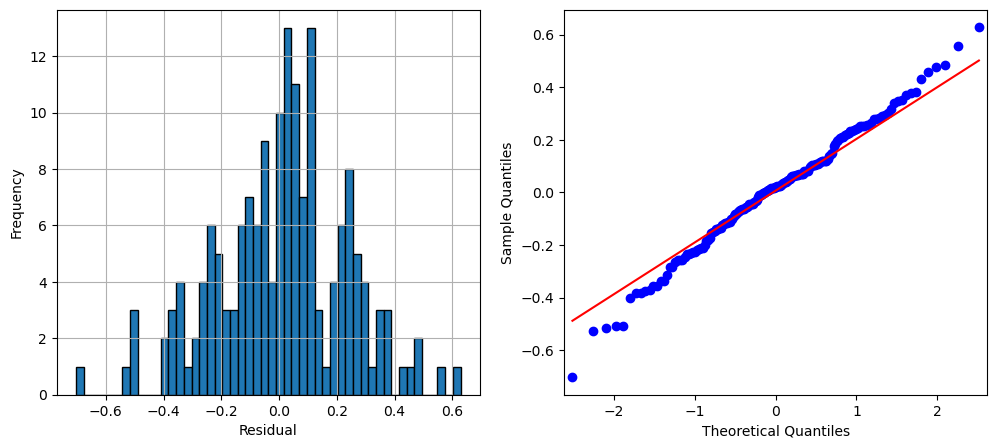

In [37]:
# 13.3 c) Fit AR model of order 4
from statsmodels.tsa.arima.model import ARIMA
order = 4
data = global_temp_year


model = ARIMA(data, order=(order, 0, 0))
model = model.fit(method="yule_walker")

# Plot
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
model.resid.hist(edgecolor="black", bins=50, ax=ax1)
plt.xlabel("Residual")
plt.ylabel("Frequency")
ax2 = fig.add_subplot(1, 2, 2)
qqplot(model.resid, line="q", ax=ax2)
plt.show()



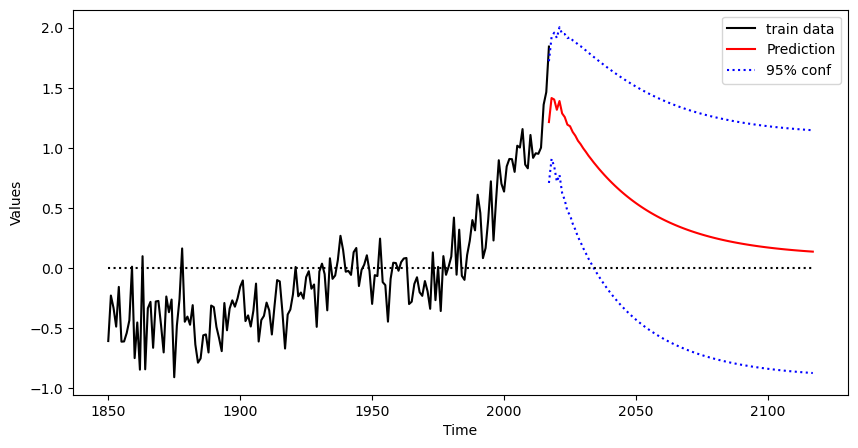

In [38]:
# 13.3 d) predict future values

pred = model.get_prediction(start="2017", end="2117")
pred = pred.prediction_results
pred_cov = pred._forecasts_error_cov
pred = pred._forecasts[0]
pred_upper = pred + 1.96 * np.sqrt(pred_cov[0][0])
pred_lower = pred - 1.96 * np.sqrt(pred_cov[0][0])

# Plot
x = global_temp_year.index.year
x_pred = np.arange(2017, 2118)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, global_temp_year, '-k', label='train data')
ax.plot(x_pred, pred, 'r', label='Prediction')
ax.plot(x_pred, pred_upper, ':b', label='95% conf')
ax.plot(x_pred, pred_lower, ':b')
ax.plot([x[0], x_pred[-1]], [0, 0], ':k')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


## Aufgabe 13.4

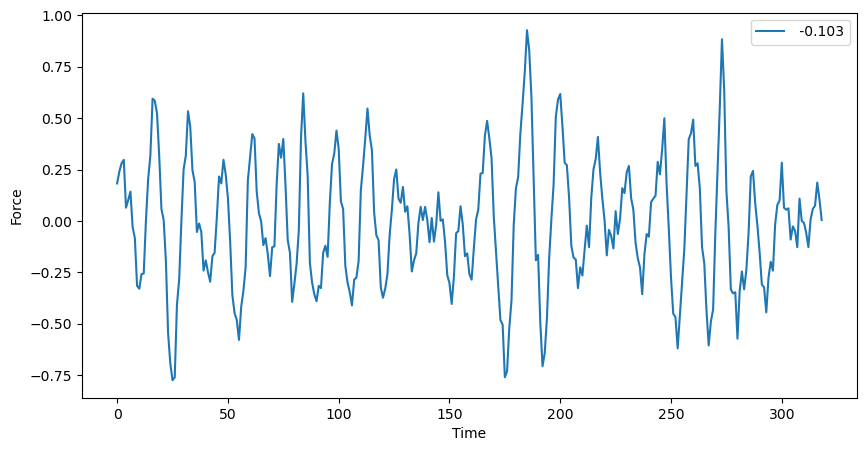

In [41]:
import pandas as pd 

force = pd.read_csv("data/force.txt")

import matplotlib.pyplot as plt
# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
force.plot(ax=ax)
plt.xlabel("Time")
plt.ylabel("Force")
plt.show()


In [43]:
force_train = force.iloc[:280]
force_test = force - force_train

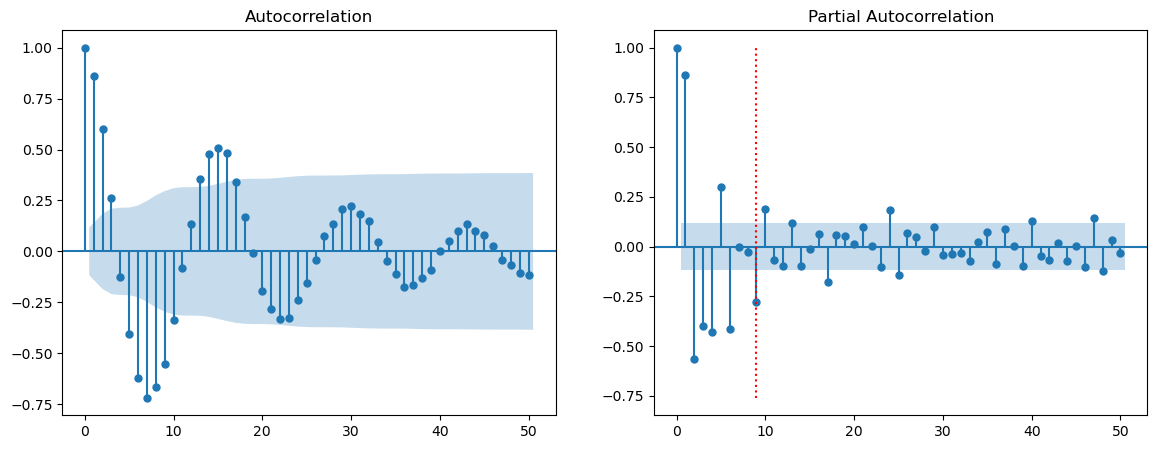

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

data = force_train
lags = 50

if lags > len(data)/2:
    lags = len(data)/2 - 1

# Plot
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
plot_acf(data, lags=lags, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
plot_pacf(data, lags=lags, ax=ax2)
ax2.plot([9, 9], [-0.76, 1], ':r')

plt.show()

# expoential decey --> AR fits! Order = 6

                               SARIMAX Results                                
Dep. Variable:                 -0.103   No. Observations:                  280
Model:                 ARIMA(6, 0, 0)   Log Likelihood                 256.137
Date:                Thu, 19 Jun 2025   AIC                           -496.275
Time:                        17:26:42   BIC                           -467.196
Sample:                             0   HQIC                          -484.611
                                - 280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.016     -0.451      0.652      -0.038       0.024
ar.L1          1.1709      0.057     20.397      0.000       1.058       1.283
ar.L2         -0.3088      0.089     -3.475      0.0

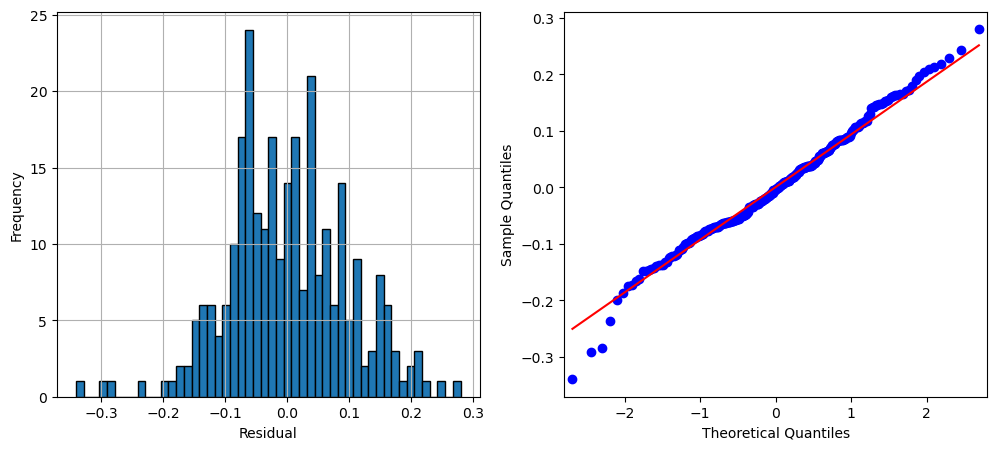

In [55]:
# fit model

from statsmodels.tsa.arima.model import ARIMA
order = 6
data = force_train

model = ARIMA(data, order=(order, 0, 0))
model = model.fit(method="yule_walker")

print(model.summary())

# Plot
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
model.resid.hist(edgecolor="black", bins=50, ax=ax1)
plt.xlabel("Residual")
plt.ylabel("Frequency")
ax2 = fig.add_subplot(1, 2, 2)
qqplot(model.resid, line="q", ax=ax2)
plt.show()

# residuals good enough are normally distributed

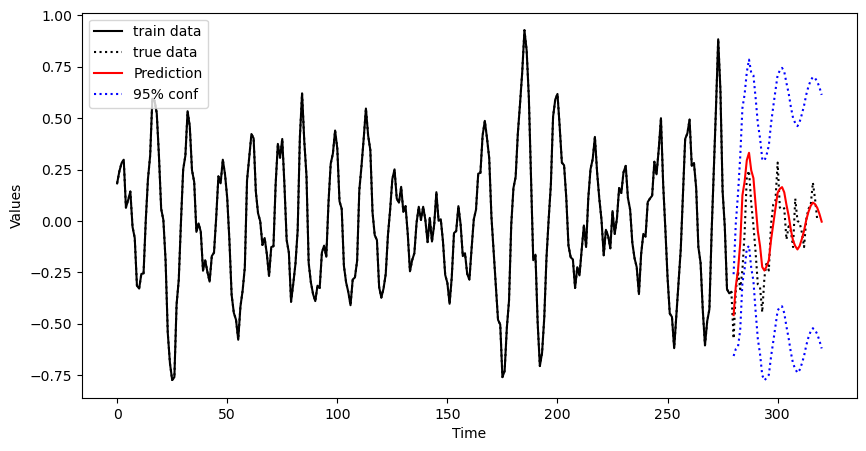

In [ ]:
# 13.4 d) predict future values
# Predict including confidence interval

pred = model.get_prediction(start=280, end=320).prediction_results
pred_cov = pred._forecasts_error_cov
pred = pred._forecasts[0]
pred_upper = pred + 1.96 * np.sqrt(pred_cov[0][0])
pred_lower = pred - 1.96 * np.sqrt(pred_cov[0][0])

# Plot
x_pred = np.arange(280, 321)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(force_train, '-k', label='train data')
ax.plot(force, ':k', label='true data')
ax.plot(x_pred, pred, 'r', label='Prediction')
ax.plot(x_pred, pred_upper, ':b', label='95% conf')
ax.plot(x_pred, pred_lower, ':b')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()
